# Safe Absorbing States

Number of Omega-automaton states (including the trap state): 4


added epsilon action: (0, 0, 0, 0) 5 -> (0, 1, 0, 0)
added epsilon action: (0, 0, 0, 0) 6 -> (0, 2, 0, 0)
added epsilon action: (0, 0, 0, 1) 5 -> (0, 1, 0, 1)
added epsilon action: (0, 0, 0, 1) 6 -> (0, 2, 0, 1)
added epsilon action: (0, 0, 0, 2) 5 -> (0, 1, 0, 2)
added epsilon action: (0, 0, 0, 2) 6 -> (0, 2, 0, 2)
added epsilon action: (0, 0, 0, 3) 5 -> (0, 1, 0, 3)
added epsilon action: (0, 0, 0, 3) 6 -> (0, 2, 0, 3)
added epsilon action: (0, 0, 1, 0) 5 -> (0, 1, 1, 0)
added epsilon action: (0, 0, 1, 0) 6 -> (0, 2, 1, 0)
added epsilon action: (0, 0, 1, 1) 5 -> (0, 1, 1, 1)
added epsilon action: (0, 0, 1, 1) 6 -> (0, 2, 1, 1)
added epsilon action: (0, 0, 1, 2) 5 -> (0, 1, 1, 2)
added epsilon action: (0, 0, 1, 2) 6 -> (0, 2, 1, 2)
added epsilon action: (0, 0, 1, 3) 5 -> (0, 1, 1, 3)
added epsilon action: (0, 0, 1, 3) 6 -> (0, 2, 1, 3)
added epsilon action: (0, 0, 2, 0) 5 -> (0, 1, 2, 0)
added epsilon action: (0, 0, 2, 0) 6 -> (0, 2, 2, 0)
added epsilon action: (0, 0, 2, 1) 5 -> (0, 1,

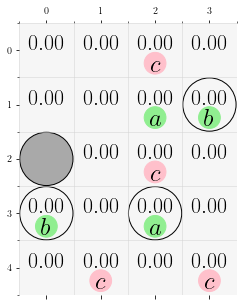

In [5]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

# LTL Specification
ltl = '(F G a | F G b) & G !c'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,4)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'T'],
['B',  'E',  'E',  'E'],
['T',  'E',  'T',  'E'],
['E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),     ('c',),()],
[(),       (),     ('a',),('b',)],
[(),       (),     ('c',),()],
[('b',),   (),     ('a',),()],
[(),       ('c',), (),    ('c',)]
],dtype=object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures
grid_mdp.plot()

# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [6]:
Q=csrl.q_learning(T=100,K=100000)

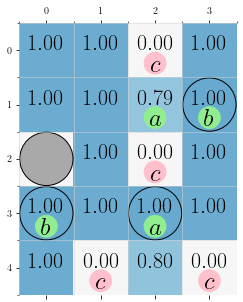

In [7]:
value=np.max(Q,axis=4)
# csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.pdf')
csrl.plot(value,iq=(0,0))

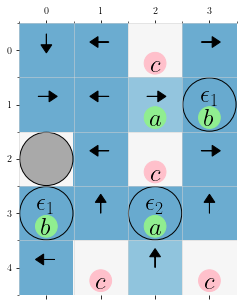

In [8]:
policy=np.argmax(Q,axis=4)
# csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.pdf')
csrl.plot(value,policy,iq=(0,0))

In [11]:
episode=csrl.simulate(policy,start=(0,0),T=1000)

interactive(children=(IntSlider(value=0, description='t', max=999), Output()), _dom_classes=('widget-interact'…

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=2.)
sns.set_style({'font.family': 'Times New Roman'})

# Maximal probabilities
pmax = np.array([
    [1.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 0.8, 1.0],
    [0.0, 1.0, 0.0, 1.0],
    [1.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 0.8, 0.0]
])

R = 100  # Repetitions
K_max = 18  # Log2 of the maximum episode length 
e = np.zeros((K_max, R))  # Error matrix
for k,K in enumerate(2**np.arange(K_max)):
    for i in range(R):
        Q=csrl.q_learning(T=100,K=K)
        value=np.max(Q,axis=4)
        e[k,i] = np.linalg.norm(value[0,0]-pmax)

mean = np.mean(e,axis=1)
std = np.std(e,axis=1)

# Plot the errors
K_min = 10  #  Log2 of the minimum episode length to be plotted
plt.figure(figsize=(6,6))
plt.errorbar(np.arange(K_min,K_max),mean[K_min:],yerr=std[K_min:],capsize=6,capthick=2,linewidth=3)
plt.xlabel(r'Number of Episodes')
plt.xticks(np.arange(K_min,K_max),['$2^{'+str(i)+'}$' for i in np.arange(K_min,K_max)])
plt.ylabel('L2 Norm of Errors')
plt.yticks(np.arange(0.0,1.1,0.1))
plt.grid(True)
plt.gca().xaxis.set_label_coords(0.4, -0.14)
plt.gca().set_facecolor('whitesmoke')
# plt.savefig('convergence.pdf',bbox_inches='tight')

KeyboardInterrupt: 